Comparar la eficiencia de los metodos:



*   Crudo
*   Acierto y error
*   Muestreo importancia

con

$$
I=∫_0^1 \cos{\left(\frac{πx}{2}\right)} dx
$$

**Analiticamente**

Por sustitución, hacemos

$$
u=\frac{πx}{2}\hspace{1cm}du=\frac{π}{2}dx
$$

Entoces,

$$
I=∫_0^1 \cos{\left(\frac{πx}{2}\right)} dx=\frac{2}{π}∫_0^1 \cos{(u)} du=\frac{2}{π}\sin{\left(\frac{πx}{2}\right)}\Bigg|_0^1=\frac{2}{π}≈0.6366197724
$$

**Simulación**

*Media muestral o crudo*

In [ ]:
# Llamamos las librerias

import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import time
from prettytable import PrettyTable

**Paso 1.** Defina las variables que intervienen en el modelo.

Definimos $x_i∼U(0,1)$, como una v.a. uniforme en $(0,1)$ que nos servirá para simular el lanzamiento de un dardo sobre el segmento $(0,1)$.

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
f(x_i) = \left\{
            \begin{array}{ll}
	      1 & \mathrm{si\ } 0\leq x_i\leq 1 \\
	      0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x_i) = \left\{
            \begin{array}{ll}
	      0 & \mathrm{si\ } x_i< 0 \\
        x_i & \mathrm{si\ } 0\leq x_i\leq 1 \\
	      1 & \mathrm{si\ } x_i> 1
            \end{array}
	      \right.\
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |  x_i  |
|-----------|-------|
| Intervalo | (0,1) |

In [ ]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule un lanzamiento de un dardo.

def funcion(x): #Definimos la función a la cual le queremos calcular la integral en cierto intervalo.
    return (math.cos(math.pi*x/2))

def experimentos(n): #Definimos una función que realizara la simulación
    aprox = 0 #Contador que ira sumando las evaluaciones de la función en el intervalo de integración N cantidad de veces.
    integral=[] #Guardara las aproximaciones del área bajo la curva de la función.
    ensayos=[]
    band=1
    error = 0.5*(10E-4)
    estabilidad = 0

    for i in range(1,n+1):
        aprox = aprox + funcion(rnd.random()) #Cada vez va sumando la evaluación de la función hasta llegar N cantidad de veces
        ensayos.append(i) #Se va guardando en una lista la iteración i.
        integral.append(aprox/i) #Se va guardando la aproximación a la integral en la iteración i.

        #CONDICIÓN DE ESTABILIDAD
        dif = abs(integral[i-1] - integral[i - 2])
        if dif < error:
            estabilidad += 1
        else:
            estabilidad = 0

        if estabilidad > 10 and band:
            estable = i
            band = 0
        elif not band:
            pass
        else:
            estable = i-1
    return integral,estable #Regresamos una lista de las aproxiamciones al valor de la integral de todas las iteraciones.
                            #así como el paso "i" en el cual se cumple la condicion de estado estable

exp = experimentos(1500) #Hara el experimento 1500 veces

media = np.mean(exp[0]) #Saca la media de los experimentos, eso nos dará una idea de la aproximación al valor de la integral.

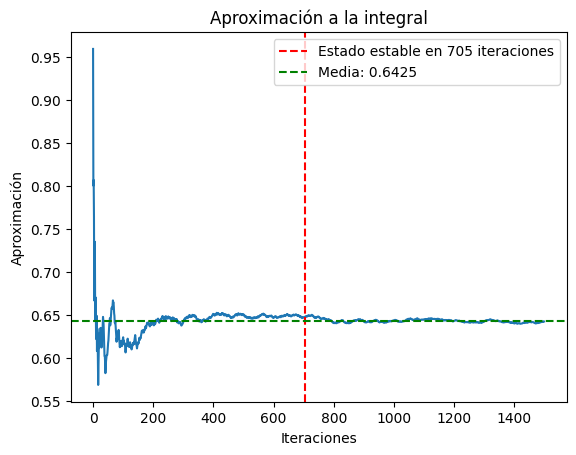

In [ ]:
# PASO 7. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

plt.plot(exp[0]) #Grafica la lista de aproximaciones de acuerdo a la cantidad de experimentos realizados.
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación')
plt.title('Aproximación a la integral')

# Agrega una línea vertical en donde comienza el estado estable.
plt.axvline(x=exp[1], color='red', linestyle='--', label=f'Estado estable en {exp[1]} iteraciones')
plt.axhline(media, color='g', linestyle='--', label=f'Media: {media:.4f}')

plt.legend()
plt.show()

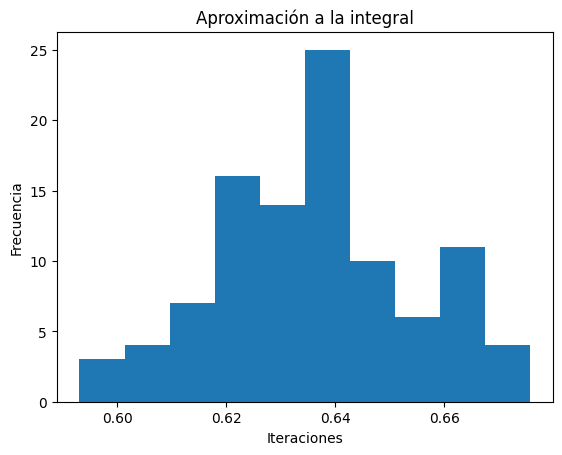

In [ ]:
# PASO 8. Replique el modelo.

def valor(repeticiones): #Esta función hara la simulación anterior muchas veces
    Area = []
    for i in range(repeticiones):
        Area.append(np.mean(experimentos(exp[1])[0])) #Calcula la media los experiementos unas N cantidad de veces.
    return Area #Nos regresa N medias de los experimentos cada una.

start_time = time.time() # Calcular el tiempo de ejecución
simulacion = valor(100)
end_time = time.time()
tiempo1 = end_time - start_time
media_crudo = np.mean(simulacion) #Saca la media de las N simulaciones realizadas, eso nos dará una mejor de la aproximación al valor de la integral.

plt.hist(simulacion) #Grafica las frecuencias de la aproximación al valor de la integral de las N simualciones con los experiementos cada una.
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación a la integral')
plt.show()

In [ ]:
# PASO 9. Calcule la media del área bajo la curva de la función y su desviación estándar.

desviacion_crudo = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

print("La media es:", media_crudo)
print("La desviación estandar es:", desviacion_crudo)

La media es: 0.6362956987179404
La desviación estandar es: 0.017589564458901603


In [ ]:
# PASO 10. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del 95%

alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para alpha / 2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media_crudo - z_alpha_2 * (desviacion_crudo / math.sqrt(100)) #Sacamos limite inferior
l_superior = media_crudo + z_alpha_2 * (desviacion_crudo / math.sqrt(100)) #Sacamos limite superior
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confianza del 95%

Entonces:  0.6328482074336211 < μ < 0.6397431900022598


*Acierto y error*

**Paso 1.** Defina las variables que intervienen en el modelo.

Definimos $(x_i,y_i)∼U(0,1)$, como v.a. uniforme en $(0,1)$ que nos servirán para simular el lanzamiento de un dardo sobre el segmento $(0,1)$.

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
f(x_i) = \left\{
            \begin{array}{ll}
	      1 & \mathrm{si\ } 0\leq x_i\leq 1 \\
	      0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

$$
f(y_i) = \left\{
            \begin{array}{ll}
	      1 & \mathrm{si\ } 0\leq y_i\leq 1 \\
	      0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x_i) = \left\{
            \begin{array}{ll}
	      0 & \mathrm{si\ } x_i< 0 \\
        x_i & \mathrm{si\ } 0\leq x_i\leq 1 \\
	      1 & \mathrm{si\ } x_i> 1
            \end{array}
	      \right.\
$$

$$
F(y_i) = \left\{
            \begin{array}{ll}
	      0 & \mathrm{si\ } y_i< 0 \\
        y_i & \mathrm{si\ } 0\leq y_i\leq 1 \\
	      1 & \mathrm{si\ } y_i> 1
            \end{array}
	      \right.\
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |  x_i  |  y_i  |
|-----------|-------|-------|
| Intervalo | (0,1) | (0,1) |

In [ ]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule un lanzamiento de un dardo.

def estimacion(N):
    l = []  # Lista para almacenar los valores estimados en cada iteración
    exitos = 0  # Contador de éxitos (puntos bajo la curva)
    for i in range(N):
        U1 = rnd.random()  # Genera un número aleatorio U1 en el intervalo [0, 1]
        U2 = rnd.random()  # Genera otro número aleatorio U2 en el intervalo [0, 1]
        if U2 <= math.cos(math.pi * U1 / 2):  # Verifica si el punto está bajo la curva de cos(pi*U1/2)
            exitos += 1  # Incrementa el número de éxitos si se cumple la condición
        prob = exitos / (i + 1)  # Calcula la probabilidad (aciertos acumulados / iteraciones)
        l.append(prob)  # Guarda la probabilidad en la lista
    return l  # Devuelve la lista con las probabilidades estimadas en cada corrida

media2 = np.mean(estimacion(1500))

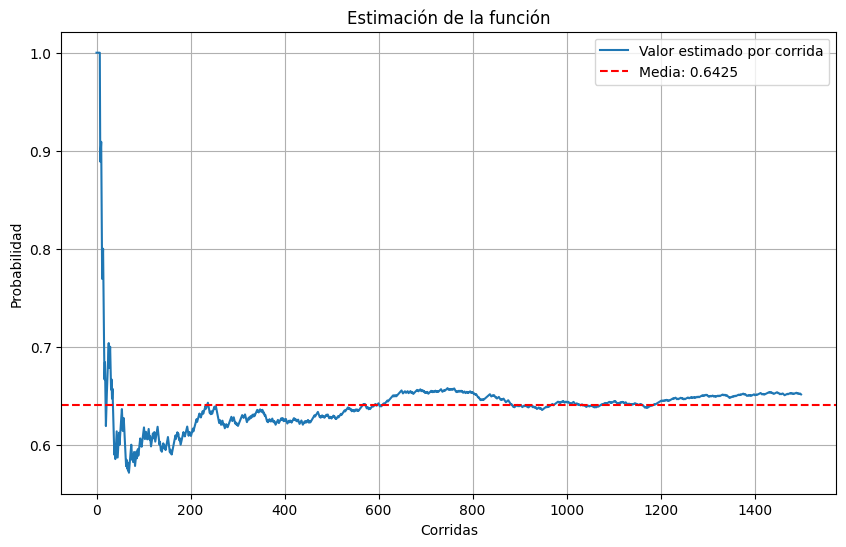

In [ ]:
# PASO 7. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

# Realiza la estimación con 1500 iteraciones
G = estimacion(1500)

# Visualiza los resultados de la estimación
plt.figure(figsize=(10, 6))
plt.plot(G, label='Valor estimado por corrida')  # Grafica el valor estimado en cada corrida
plt.axhline(media2, color='r', linestyle='--', label=f'Media: {media:.4f}')  # Línea horizontal en la media
plt.title('Estimación de la función')
plt.xlabel('Corridas')
plt.ylabel('Probabilidad')
plt.legend()  # Añade leyenda
plt.grid(True)  # Activa la cuadrícula
plt.show()

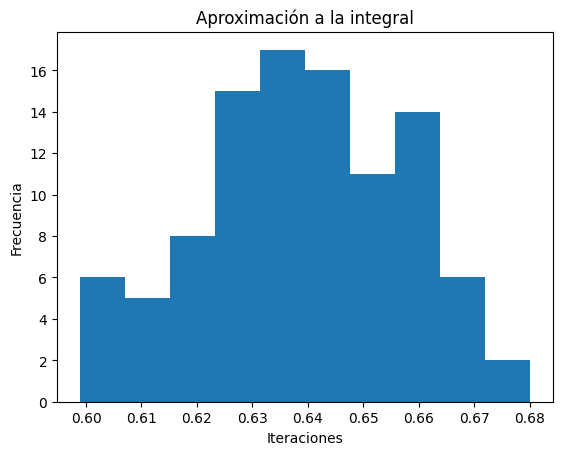

In [ ]:
# PASO 8. Replique el modelo.

def modelo(n):
    lista = []  # Lista para almacenar las medias de cada corrida
    for i in range(n):
        s = estimacion(1500)  # Realiza una corrida de 500 iteraciones
        lista.append(np.mean(s))  # Calcula y guarda la media de las estimaciones de esa corrida
    return lista  # Devuelve la lista de medias

# Corre el modelo con 100 iteraciones (corridas de 1500 simulaciones cada una)
start_time = time.time()
Y = modelo(100)
end_time = time.time()
tiempo2 = end_time - start_time # Calcular el tiempo de ejecución

# Genera un histograma de los valores obtenidos en el modelo
plt.hist(Y)  # Grafica la distribución de las medias
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación a la integral')
plt.show()

In [ ]:
# PASO 9. Calcule la media del área bajo la curva de la función y su desviación estándar.

media_ah = np.mean(Y)
desviacion_ah = np.std(Y)
print("La media es:", media_ah)
print("La desviación estandar es:", desviacion_ah)

La media es: 0.63864825142573
La desviación estandar es: 0.01855148280920853


In [ ]:
# PASO 10. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del 95%

alpha = 1 - 0.95  # Nivel de significancia (5%)
z_alpha_2 = norm.ppf(1 - alpha / 2)  # Valor crítico para un intervalo de confianza del 95%
l_inferior = media_ah - z_alpha_2 * (desviacion_ah / math.sqrt(100))  # Límite inferior del intervalo de confianza
l_superior = media_ah + z_alpha_2 * (desviacion_ah / math.sqrt(100))  # Límite superior del intervalo de confianza
print("Entonces: ", l_inferior, "< \u03BC <", l_superior)  # Imprime el intervalo de confianza

Entonces:  0.6350122276091438 < μ < 0.6422842752423162


*Muestreo importancia*

**Paso 1.** Defina las variables que intervienen en el modelo.

Necesitamos definir dos funciones, primero

$$
f(x)=\cos{\left(\frac{πx}{2}\right)},\hspace{1cm}0\leq x\leq 1
$$

y una función de densidad $g(x)$ con soporte $(0,1)$ tal que la integral se pueda transformar de la siguiente manera

$$
I=\int_0^1 \frac{f(x)}{g(x)}g(x)dx=E\left[\frac{f(x)}{g(x)}\right] ≈\frac{1}{n}∑_{i=1}^n \frac{f(x_i)}{g(x_i)}
$$

donde $x_i∼U(0,1)$.

Desarrollamos $f(x)$ en serie de Taylor,

$$
\cos{\left(\frac{πx}{2}\right)}=1-\frac{π^2x^2}{8}+\frac{π^4x^4}{2^44!}-...≈1-x^2
$$

Entonces, definimos $g(x)=1-x^2$. Como queremos que $g(x)$ sea una función de densidad debe cumplir

$$
a)\hspace{1cm}g(x)\geq 0⇒1-x^2\geq 0⇒1\geq x^2⇒-1\leq x\leq 1
$$

Por lo tanto, $g(x)\geq 0$ en el intervalo $(0,1)$.

$$
b)\hspace{1cm}∫_0^1 c(1-x^2) dx=1⇒c\left(x-\frac{x^3}{3}\right)\Bigg|_0^1=1⇒\frac{2}{3}c=1⇒c=\frac{3}{2}
$$

Observamos que la integral se hace 1 si multiplicamos $g(x)$ por el factor c, asi $g(x)=\frac{3}{2}(1-x^2)$ es función de densidad.

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
g(x) = \left\{
            \begin{array}{ll}
	      \frac{3}{2}(1-x^2) & \mathrm{si\ } 0\leq x\leq 1 \\
	      0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
G(x)=∫_0^x \frac{3}{2}(1-x^2)dx=\frac{3}{2}\left(x-\frac{x^3}{3}\right)\Bigg|_0^x=\frac{3}{2}x-\frac{x^3}{2}
$$

$$
G(x) = \left\{
            \begin{array}{ll}
	      0 & \mathrm{si\ } x< 0 \\
        \frac{x}{2}(3-x^2) & \mathrm{si\ } 0\leq x\leq 1 \\
	      1 & \mathrm{si\ } x> 1
            \end{array}
	      \right.\
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |   x   |  
|-----------|-------|
| Intervalo | (0,1) |

In [ ]:
# PASO 5: Genere números aleatorios.

def g(x): # Esta función es utilizada para la generación de números aleatorios en el método de aceptación y rechazo.
    return (3/2) * (1 - x**2)

def MR(N): # Genera N números aleatorios utilizando el método de aceptación y rechazo con la función g(x) definida previamente.
    lista = []  # Inicializa una lista vacía para almacenar los números generados

    while len(lista) < N:  # Continúa el proceso hasta que se hayan generado N números
        U1 = np.random.uniform()  # Genera un número aleatorio U1 en el intervalo [0, 1)
        U2 = np.random.uniform()  # Genera otro número aleatorio U2 en el intervalo [0, 1)
        g1 = g(U2)  # Calcula el valor de g(U2) usando la función g

        if U1 < g1 / 1.5:  # Verifica si U1 es menor que g1 / 1.5 para aceptar el número
            lista.append(U2)  # Si la condición se cumple, agrega U2 a la lista

    return lista  # Devuelve la lista de números generados

In [ ]:
# PASO 6: Simule un lanzamiento de un dardo.

def f(x): # Definimos la función objetivo
  return (np.cos(np.pi * x / 2))

def estimacion3(N, a=0, b=1):
  gs = []  # Lista para almacenar los valores de F/G.
  l = []   # Lista para almacenar las estimaciones de theta.

  for i in range(N):
    lista = MR(1)  # MR(1) genera una lista de un número aleatorio definido en el paso anterior.
    U = float(lista[0])  # Convertimos el primer número de la lista a un número flotante.

    F = f(U)  # Evaluamos la función f en el valor U.
    G = g(U)  # Evaluamos la función g en el valor U.

    gs.append(F / G)  # Guardamos el cociente F/G en la lista gs.

    suma = sum(gs)  # Sumamos todos los elementos de gs hasta el momento.
    theta = (1 / (i + 1)) * suma  # Calculamos la estimación de theta dividiendo la suma por el número de iteraciones.

    l.append(theta)  # Guardamos el valor de theta en la lista l.

  return l  # Retornamos la lista con todas las estimaciones de theta.

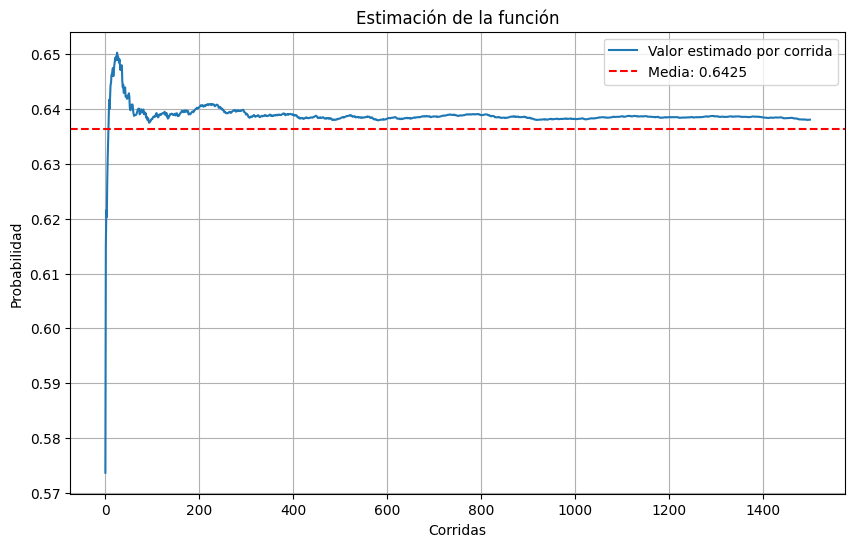

In [ ]:
# PASO 7. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

# Realiza la estimación con 1500 iteraciones
F = estimacion3(1500)
media3 = np.mean(estimacion3(1500))

# Visualiza los resultados de la estimación
plt.figure(figsize=(10, 6))
plt.plot(F, label='Valor estimado por corrida')  # Grafica el valor estimado en cada corrida
plt.axhline(media3, color='r', linestyle='--', label=f'Media: {media:.4f}')  # Línea horizontal en la media
plt.title('Estimación de la función')
plt.xlabel('Corridas')
plt.ylabel('Probabilidad')
plt.legend()  # Añade leyenda
plt.grid(True)  # Activa la cuadrícula
plt.show()

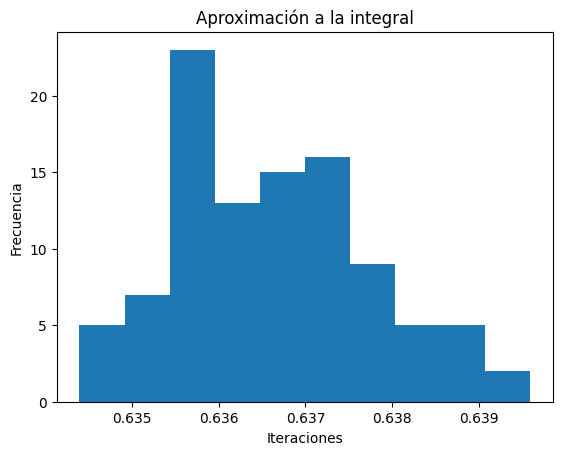

In [ ]:
# PASO 8. Replique el modelo.

def replica(n):
    lista = []  # Lista para almacenar las medias de cada corrida
    for i in range(n):
        s = estimacion3(1500)  # Realiza una corrida de 500 iteraciones
        lista.append(np.mean(s))  # Calcula y guarda la media de las estimaciones de esa corrida
    return lista  # Devuelve la lista de medias

# Corre el modelo con 100 iteraciones (corridas de 1500 simulaciones cada una)
start_time = time.time()
Z = replica(100)
end_time = time.time()
tiempo3 = end_time - start_time # Calcular el tiempo de ejecución

# Genera un histograma de los valores obtenidos en el modelo
plt.hist(Z)  # Grafica la distribución de las medias
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación a la integral')
plt.show()

In [ ]:
# PASO 9. Calcule la media del área bajo la curva de la función y su desviación estándar.

media_mi = np.mean(Z)
desviacion_mi = np.std(Z)
print("La media es:", media_mi)
print("La desviación estandar es:", desviacion_mi)

La media es: 0.6366498277628648
La desviación estandar es: 0.0011223577865951205


In [ ]:
# PASO 10. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del 95%

alpha = 1 - 0.95  # Nivel de significancia (5%)
z_alpha_2 = norm.ppf(1 - alpha / 2)  # Valor crítico para un intervalo de confianza del 95%
l_inferior = media_mi - z_alpha_2 * (desviacion_mi / math.sqrt(100))  # Límite inferior del intervalo de confianza
l_superior = media_mi + z_alpha_2 * (desviacion_mi / math.sqrt(100))  # Límite superior del intervalo de confianza
print("Entonces: ", l_inferior, "< \u03BC <", l_superior)  # Imprime el intervalo de confianza

Entonces:  0.6364298496789154 < μ < 0.6368698058468143


**Comparación de los metodos**

In [ ]:
# Resumen de los resultados

tabla = PrettyTable(["Metodo", "Valor esperado", "Varianza", "Tiempo de ejecucion (segundos)"])

tabla.add_row(["Media muestral", ("{:.4f}".format(media_crudo)), ("{:.6f}".format(np.var(simulacion))), ("{:.4f}".format(tiempo1))])
tabla.add_row(["Acierto y error", ("{:.4f}".format(media_ah)), ("{:.6f}".format(np.var(Y))), ("{:.4f}".format(tiempo2))])
tabla.add_row(["Muestreo importancia", ("{:.4f}".format(media_mi)), ("{:.6f}".format(np.var(Z))), ("{:.4f}".format(tiempo3))])

print(tabla)

+----------------------+----------------+----------+--------------------------------+
|        Metodo        | Valor esperado | Varianza | Tiempo de ejecucion (segundos) |
+----------------------+----------------+----------+--------------------------------+
|    Media muestral    |     0.6363     | 0.000309 |             0.0728             |
|   Acierto y error    |     0.6386     | 0.000344 |             0.1105             |
| Muestreo importancia |     0.6366     | 0.000001 |            10.5340             |
+----------------------+----------------+----------+--------------------------------+


Diremos que el primer método es más eficiente que el segundo si:

$$
𝛆=\frac{t_1var(θ_1)}{t_2var(θ_2)}<1
$$

In [ ]:
# Resultado de epsilon para cada caso

epsilon1 = (tiempo1*np.var(simulacion)) / (tiempo2*np.var(Y))
epsilon2 = (tiempo1*np.var(simulacion)) / (tiempo3*np.var(Z))
epsilon3 = (tiempo2*np.var(Y)) / (tiempo1*np.var(simulacion))
epsilon4 = (tiempo2*np.var(Y)) / (tiempo3*np.var(Z))
epsilon5 = (tiempo3*np.var(Z)) / (tiempo1*np.var(simulacion))
epsilon6 = (tiempo3*np.var(Z)) / (tiempo2*np.var(Y))

tabla = PrettyTable(["Metodo", "Media muestral", "Acierto y error", "Muestreo importancia"])

tabla.add_row(["Media muestral", "-", ("{:.4f}".format(epsilon3)), ("{:.4f}".format(epsilon5))])
tabla.add_row(["Acierto y error", ("{:.4f}".format(epsilon1)), "-", ("{:.4f}".format(epsilon6))])
tabla.add_row(["Muestreo importancia", ("{:.4f}".format(epsilon2)), ("{:.4f}".format(epsilon4)), "-"])

print(tabla)

+----------------------+----------------+-----------------+----------------------+
|        Metodo        | Media muestral | Acierto y error | Muestreo importancia |
+----------------------+----------------+-----------------+----------------------+
|    Media muestral    |       -        |      1.6893     |        0.5893        |
|   Acierto y error    |     0.5920     |        -        |        0.3488        |
| Muestreo importancia |     1.6969     |      2.8666     |          -           |
+----------------------+----------------+-----------------+----------------------+


In [ ]:
# Resultados

if epsilon1 < 1:
  print("El metodo media muestral es mas eficiente que acierto y error")

if epsilon2 < 1:
  print("El metodo media muestral es mas eficiente que muestreo importancia")

if epsilon3 < 1:
  print("El metodo acierto y error es mas eficiente que media muestral")

if epsilon4 < 1:
  print("El metodo acierto y error es mas eficiente que muestreo importancia")

if epsilon5 < 1:
  print("El metodo muestreo importancia es mas eficiente que media muestral")

if epsilon6 < 1:
  print("El metodo muestreo importancia es mas eficiente que acierto y error")

El metodo media muestral es mas eficiente que acierto y error
El metodo muestreo importancia es mas eficiente que media muestral
El metodo muestreo importancia es mas eficiente que acierto y error
